<h1><center> DS 300: Take-home Quiz 7 - PCA</center></h1>

## Introduction

#### Dimensionality Reduction with PCA and LDA

PCA and LDA are two common dimensionality reduction techniques. They are sometimes used on its own and may also be used in combination with scale construction and factor analysis. In this lab, we will try several ways of running PCA in Python with a couple of famous datasets.


#### Dataset: Iris

The [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), found in many clustering or machine learning examples across Python and R, explores several notable features such as sepal length and width and petal length and width for three types of Iris flowers, the [Iris setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg), [Iris versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg), and [Iris virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/440px-Iris_virginica.jpg).

![Image](https://steemitimages.com/640x0/https://i.imgur.com/FDL36bf.png)

---

## Question 1

#### Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Given the column names in the list `df_cols`, create a DataFrame named `df` from the `iris.data` dataset. Dataset [URL](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/iris.data).

In [2]:
# Given the following column names
df_cols = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

# Load the dataset into a DataFrame
url = 'https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/iris.data'
df = pd.read_csv(url, names=df_cols, header=None)




# Display the DataFrame
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Show the basic information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  152 non-null    float64
 1   sepal_wid  153 non-null    float64
 2   petal_len  153 non-null    float64
 3   petal_wid  152 non-null    float64
 4   class      155 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.2+ KB


#### Find the total number of missing values and drop all the NaNs.

In [4]:
df.isna().sum()



sepal_len    3
sepal_wid    2
petal_len    2
petal_wid    3
class        0
dtype: int64

#### Drop the rows with any missing values.

In [5]:
df.dropna(inplace=True)



In [6]:
# Display the top 10 record after dropping
df.head(10)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa


#### Notice dropping the missing values has messed up the index of the DataFrame (e.g., index 7 is gone), let's reset the index of the DataFrame

In [7]:
df.reset_index(inplace=True, drop=True)


In [8]:
df.head(10)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Question 2:

#### Split the dataset into X (features) and y (labels).

In [9]:
# Split the dataset into X and y
X = df.drop('class', axis=1)

y = df['class']



In [10]:
X.shape

(150, 4)

In [11]:
y.shape

(150,)

#### Standardize the X matrix.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [14]:
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

## Question 3:

#### Apply PCA on X matrix to generate `X_reduced` that uses the PCs as the new basis. Ensure to include all the possible principal components. 

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X)
X_reduced = pca.transform(X)


# Show the shape of X_reduced
X_reduced.shape

(150, 4)

#### Use all the PCs to construct a new DataFrame `df_pca` by using `X_reduced`, and the label column `class`.

In [16]:
df_pca = pd.DataFrame(X_reduced)
df_pca['class'] = df['class']



df_pca.head()

,0,1,2,3,class
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


## Question 4:

#### Find the eigenvalues and eigenvectors from the trained PCA object. 
Hint: study the attributes for the trained `pca` object ([link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html))

In [17]:

print('Eigenvalues  \n', pca.explained_variance_ )


print('Eigenvectors \n', pca.components_ )




Eigenvalues  
 [2.93035378 0.92740362 0.14834223 0.02074601]
Eigenvectors 
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


#### A Scree Plot is a simple line or bar plot that shows the fraction of total variance in the data as explained or represented by each PC. The PCs are ordered by decreasing order of contribution to total variance.
#### First, generate a DataFrame `df_scree` with the total 'explained variance ratio' by each PC. Then, use bar plot to show the numbers.

In [18]:
df_scree = pd.DataFrame([['PC1', 'PC2', 'PC3', 'PC4'],pca.explained_variance_ratio_], index=['PC', 'contribution']).T



df_scree.head()

,PC,contribution
0,PC1,0.727705
1,PC2,0.230305
2,PC3,0.036838
3,PC4,0.005152


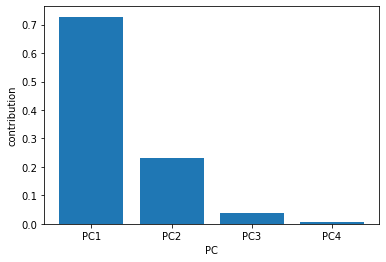

In [19]:
fig = plt.figure(figsize = (6, 4))
 
# creating the bar plot
plt.bar(df_scree['PC'], df_scree['contribution'])
 
plt.xlabel("PC")
plt.ylabel("contribution")
plt.show()

#### So more than 90% of the variance is explained by the first two principal components.

## Question 5:

#### Find all the unique labels from the DataFrame `df_pca`.

In [20]:
labels = df_pca['class'].unique()


labels 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Write a function `pca_scatter` to draw a 2D scatter plot of the dimensionality-reduced DataFrame on the new basis with 'PCA1' and 'PCA2' (columns 0 and 1 from df_pca). Reference: [link](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py)

In [21]:
def pca_scatter(df_reduced, labels):
    '''
    Arguments: 
    1) df_reduced: DataFrame with reduced dimensionality by PCA
    2) labels: enumerate all the labels from the same DataFrame
    '''
    plt.figure()
    colors = ['red', 'cyan', 'blue']
    lw = 2

    for color,label_name in zip(colors, labels):
        # use scatter plot to create your own graph
        plt.scatter(
        df_reduced[y==label_name, 0], df_reduced[y==label_name,1], color=color, alpha=0.8, lw=lw, label=label_name
        )
        
        
        
        
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA plot of Dataset with pricipal components 1 and 2')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

#### Plot the scatter plot with `pca_scatter`

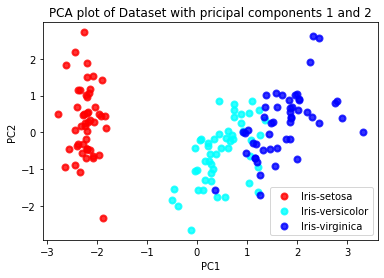

In [22]:
pca_scatter(X_reduced, labels)

## Question 6:

#### Let's try to implement our own PCA model by using linear algebra.  
#### Step 1: normalize the X matrix so that it has zero mean. (This is step is already done before, but let's redo it here. )

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


#### Step 2: generate covariance matrix with `X`. Note you need to transpose `X` then apply covariance calculation.
Hint: check out np.cov() function

In [24]:
# Covariance Matrix
cov_mat = np.cov(X.T)


cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

#### Step 3: Use `eig` function from `np.linalg` to get the eigenvalues and eigenvectors. Compare the results with Q4. 

In [25]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvalues:\n', eig_vals)
print('\nEigenvectors:\n', eig_vecs)

Eigenvalues:
 [2.93035378 0.92740362 0.14834223 0.02074601]

Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


## Question 7: PCA evaluation

#### Examining PCA loading scores

One way to understand PCA results is by looking at component loadings or loading scores. This allows us to see how informative a particular variable is for the principal component.

In [26]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

#### Create a DataFrame for the loading scores.

In [27]:
df.drop('class', axis=1).columns

Index(['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'], dtype='object')

In [28]:
df_loading = pd.DataFrame(pca.components_)
df_loading = df_loading.set_index(df.drop('class', axis=1).columns)
df_loading.set_axis(['PC1','PC2', 'PC3', 'PC4'],axis=1, inplace=True)


df_loading.head()

,PC1,PC2,PC3,PC4
sepal_len,0.522372,-0.263355,0.581254,0.565611
sepal_wid,0.372318,0.925556,0.021095,0.065416
petal_len,-0.721017,0.242033,0.140892,0.633801
petal_wid,-0.261996,0.124135,0.801154,-0.523546


#### For the loadings above, we can see that both `sepal width` and `petal length` are highly informative in terms of the first principal component.

#### Examining PCA scoring matrix. 

The scoring matrix is simply the multiplication of two matrices: X_reduced and loading scores. It tells us how much each data sample is projected to the new basis with PCs. 

In [29]:
score = X_reduced.dot(df_loading)



# Show the top 10 records out of 150
score[:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

## Question 8: 

#### Let's use Random Forest to train the standardized dataset `without` PCA.
#### Perform train test split. Test size = 20%, random seed = 101.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=101)


# Display the top 5 records
X_train[:5]

array([[ 0.79566902, -0.1249576 ,  1.16081857,  1.31648267],
       [-0.41600969, -1.28197243,  0.1372359 ,  0.13322594],
       [ 0.79566902, -0.1249576 ,  0.99022146,  0.79059079],
       [-0.05250608, -0.8191665 ,  0.08037019,  0.00175297],
       [ 1.15917263, -0.1249576 ,  0.99022146,  1.1850097 ]])

#### Train a random forest classifier. Use criterion as 'entropy', n_estimators as 500, max_depth as 5 and random_state as 101.

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_clf = RandomForestClassifier(criterion='entropy', n_estimators=500, max_depth=5, random_state=101)
rf_clf.fit(X_train, y_train)



RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500,
                       random_state=101)

In [33]:
rf_pred = rf_clf.predict(X_test)

#### Evaluate the classification accuracy.

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
print(accuracy_score(y_test, rf_pred))



0.9666666666666667


## Question 9:

#### Now use the first 3 components from PCA to obtain the new training set.

In [36]:
pca = PCA(n_components=3)

X_reduced = pca.fit(X).transform(X)[:,:3]


#### Perform train test split. Test size = 20%, random seed = 101.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size= .20, random_state=101)


X_train[:5]

array([[ 1.8678907 ,  0.2911928 ,  0.39400433],
       [ 0.27542507, -1.32981591,  0.09344477],
       [ 1.47128019,  0.25319247,  0.03665751],
       [ 0.23601084, -0.77592378, -0.14797288],
       [ 1.88425185,  0.41433276,  0.02454855]])

#### Train a random forest classifier. Use criterion as 'entropy', n_estimators as 500, max_depth as 5 and random_state as 101.

In [38]:
rf_pca_clf = RandomForestClassifier(criterion='entropy', n_estimators=500, max_depth=5, random_state=101)
rf_pca_clf.fit(X_train, y_train)



RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500,
                       random_state=101)

In [39]:
rf_pca_pred = rf_pca_clf.predict(X_test)

#### Accuracy evaluation.

In [40]:
print(accuracy_score(y_test, rf_pca_pred))



0.9333333333333333


#### Note that applying PCA before Random Forest actually makes the model worse. This is because the original dataset only has 4 data features. Therefore reducing the dimensionality is not going to help us a ton.

## Question 10:

#### Since this is a classification problem, we have data labels. So it makes more sense for us to try LDA as a data preprocessing step. Create an LDA data transformer using 2 components, transform the data, then show a scatter plot as in Question 5 and accuracy score as in Question 9. Reference: [link](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py)

In [41]:
# Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Create an LDA transformer object using two components, then generate the new X matrix. 

In [42]:
lda = LinearDiscriminantAnalysis(n_components=2)

X_reduced = lda.fit(X,y).transform(X)



#### Recreate a DataFrame for plotting. 

In [43]:
df_lda = pd.DataFrame(X_reduced)
df_lda['class'] = df['class']


df_lda.head()

,0,1,class
0,8.084953,0.328454,Iris-setosa
1,7.147163,-0.755473,Iris-setosa
2,7.511378,-0.238078,Iris-setosa
3,6.837676,-0.642885,Iris-setosa
4,8.157814,0.540639,Iris-setosa


#### Plot the Data. Let's reuse the `pca_scatter()` function and ignore the title and labels. 

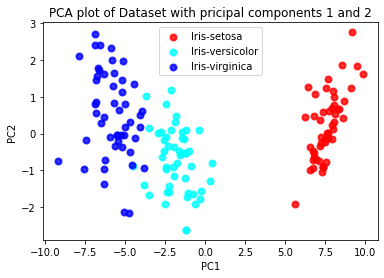

In [44]:
pca_scatter(X_reduced, labels)


#### Use the same random forest model with the LDA transformed data. Find the testing accuracy. 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, df['class'], test_size= .20, random_state=101)
rf_lda_clf = RandomForestClassifier(criterion='entropy', n_estimators=500, max_depth=5, random_state=101)
rf_lda_clf.fit(X_train, y_train)
rf_lda_pred = rf_lda_clf.predict(X_test)
print(accuracy_score(y_test, rf_lda_pred))




0.9666666666666667


# Great Job!